# Принятие решений в бизнесе

____    
    
**Название проекта**

Принятие решений в бизнесе
    
_____
**Цель исследования.**
    
Приоритизация и тестирование гипотез для увеличения выручки интернет-магазина
    
_____
**Задачи исследования.**

*Первая часть* Нам необходимо загрузить данные с описанием гипотез и оценкой их параметров. После применим феймворк ICE  и RICE с выявлением приоритетных гипотез.

*Вторая часть*

Необходимо выгрузить данные тестирования из двух датафремов. Проверить данные на полноту и пересечение массивов. Выявить
кумулятивной выручку по группам, кумулятивный средний чек по группам, а так же относительное изменение кумулятивного среднего чека группы B к группе A. В дальнейшем просмотреть кумулятивное среднее количество заказов на посетителя по группам, а так же относительного его изменения по группам. Выявить аномалии в данных количества заказов по пользователям и стоимостей заказов.
А после просмотреть статистическую знаимость различий в среднем чеке заказа, в среднем количестве заказов на посетителя между группами по "сырым" данным и "очищенным" данным.

____
**Исходные данные.**
    
*Первая часть* У нас в распоряжении датасет с описанием гипотез и оценкой параметров: Reach, Impact, Confidence, Effort.

*Вторая часть*
У нас в распоряжении два датасета по результатам проведенного  А/В тестирования. Первый содержит информацию о заказах, дате свершения их, идентификаторе пользователя, совершившего заказ, выручке и группу A/B-теста, в которую попал заказ. Второй хранит информацию о дате, группе А/В тестирования и количестве пользователей в указанную дату в указанной группе A/B-теста.

______


## Первая часть

### Приоритизация гипотез 

In [1]:
# импорт библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# выведение содержимого строк полностью с помощью set_option()
pd.set_option('display.max_colwidth', None)

In [4]:
#выведение первых 10 строчек датафрейма методом head()
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#выведение основной информации по датафрейму методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# формирование нового столбца с применение метода округления round() и дальнейшей сортировкой
data['ICE'] = round(data['Impact'] * data['Confidence'] / data['Efforts'], 2)
data_ice = data.sort_values(by = 'ICE', ascending=False)

In [7]:
cm = sns.light_palette("green", as_cmap=True)

data_ice.style.background_gradient(cmap=cm)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [8]:
# формирование нового столбца с применение метода округления round() и дальнейшей сортировкой
data['RICE'] = round((data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts'], 2)
data_rice = data.sort_values(by = 'RICE', ascending=False)

In [9]:
cg = sns.light_palette("green", as_cmap=True)

data_rice.style.background_gradient(cmap=cg)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


При построении приоритизации гипотез по методу ICE можно увидеть приоритные гипотезы: 

8.Запустить акцию, дающую скидку на товар в день рождения:
0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Данный метод основан на параметрах: Impact - влияние гипотезы на пользователей или влияние наопределенную исследуемую метрику. 
Confidence - уверенность в приведенных оценках. Efforts -  трудотраты необходимые для осуществления гипотезы.

При построении приоритизации гипотез по методу RICE можно увидеть приоритные гипотезы:

7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
6.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Данный метод основан на параметрах: Reach - охват гипотезы, сколько она затронет пользователей.
Impact - влияние гипотезы на пользователей или влияние наопределенную исследуемуюметрику. 
Confidence - уверенность в приведенных оценках. Efforts -  трудотраты необходимые для осуществления гипотезы.

Из проведенной приоритизации можем увидеть разные результаты двух методов. Данное изменение произошло из за введения параметра Reach, данный параметр является более точным, так как процентное соотношение охвата пользователей ко всем пользователям можно всегда расчитать и переложить данные цифры на 10 бальную шкалу. Метод ICE имеет более субъективные оценки параметров, и параметр Impact может измеряться по разному(по степени изменения пользовательского опыта;
по предварительной оценке важности для пользователей; по количеству новых пользователей, которых изменение поможет привлечь). Так же по данному методу при проведении приоритетной гипотезы 8, она окажет существенное влияние на показатели интернет-магазина, что будет стимулировать покупателей к значимым покупкам, но при учитывании охвата пользователей(в методе RICE) это маленький процент от всех пользователей, что может увеличить ключевые метрики, но незначительно.
Приоритетная гипотеза 7 по методу RICE имеет существенный приоритет для осуществления, так как охватит всех пользователей, и имеет достаточно высокие оценки влияния, уверенности и средние затраты; изменения при осуществлении гипотезы мы увидим быстрее и более значимые в ключевых метриках.

## Вторая часть 

### Анализ A/B-теста 

#### Обзор данных 

In [10]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм и изменение типа данных столбца date 
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
#cчитывание CSV-файла с данными с помощью библиотеки pandas и сохранение в датафрейм и изменение типа данных столбца date 
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [12]:
# функция для выведения общей информации по датафреймам
def df_info(data):
    print('Первые строки датафрейма')
    print('-'*50)
    display(data.head(10))
    print('Информация о датафрейме')
    print('-'*50)
    data.info()

In [13]:
# применение функции c выведением общей информации к датафрейму orders
df_info(orders)

Первые строки датафрейма
--------------------------------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Информация о датафрейме
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
# применение функции c выведением общей информации к датафрейму visitors
df_info(visitors)

Первые строки датафрейма
--------------------------------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Информация о датафрейме
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
# выведение являних дубликатов в датафреме orders
orders.duplicated().sum()

0

In [16]:
# выведение явных дубликатов в подмножестве
orders[['transactionId', 'visitorId']].duplicated().sum()

0

In [17]:
# выведение явных дубликатов в датафреме visitors
visitors.duplicated().sum()

0

#### Распределение групп

In [18]:
# выведение пересечения уникальных значений массивов с помощью метода np.intersect1d() 
duplicated_visitor = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), 
                                    orders.query('group == "B"')['visitorId'].unique())

In [19]:
# выведение количества методом shape
duplicated_visitor.shape[0]

58

In [20]:
# создание среза данных без пользователей оказавшихся в двух группах одновременно
orders_unique = orders.query('visitorId not in @duplicated_visitor')

После загрузки данных и просмотрев информацию по датафремам, можем сказать, что в первом датафреме можем найти информацию о индификаторе заказа, идентификаторе пользователя, дату, когда был совершен заказ, выручку заказа и группу А/В теста, куда попал заказ. А так же можем увидеть, что в данном датафрейме 5 столбцов и 1197 сток. Во втором датафреме можем найти информацию о дате, группе А/В теста и количестве пользователей в указанную дату в указанной группе A/B-теста. А так же информацию о том, что в данном датафрейме 3 столбца и 62 строки. По выведенной общей информации по датафреймам можем увидеть, что в данных не имеется пропусков в значениях, количество строк общее и в каждом из столбцов совпадает. Так же произвели проверку в датафреймах на наличие явных дубликатов

Для проверки распредления групп тестирования, выявлено пересечение пользователей, 58 пользователей оказались в двух группах одновременно, данный момент выявлен, из за сложности выведения данных пользователей, они останутся в анализе и анализ будет проводится с учетом, что часть пользователей попала в обе группы.

#### Кумулятивная выручка по группам 

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_unique[['date', 'group']].drop_duplicates()

In [22]:
# агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders_unique[
        np.logical_and(
            orders_unique['date'] <= x['date'], orders_unique['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitorId': 'nunique',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [23]:
# агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'buyers',
    'orders',
    'revenue',
    'visitors',
]

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

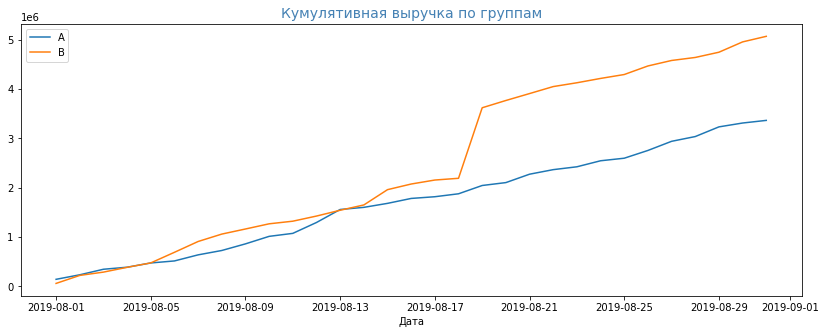

In [27]:
# Строим график выручки группы А
plt.figure(figsize=(14, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам', color = 'SteelBlue', fontsize=14)
plt.xlabel('Дата')
plt.show()

По графику можем заметить, что кумулятивная выручка постепенно растет в двух группах. Примерно до 13-08-2019 возрастала равномерно в двух группах, после группа В стала относительно возрастать группы А, так же видим резкий скачок группы В после 17-08-2019(возможно связана с заказами большой стоимости, которые попали в данную группу-аномальные, либо всплеском заказов в данной группе в данный промежуток времени) после этого кумулятивная выручка осталась на относительно высоком уровне от группы А.

#### Кумулятивный средний чек по группам 

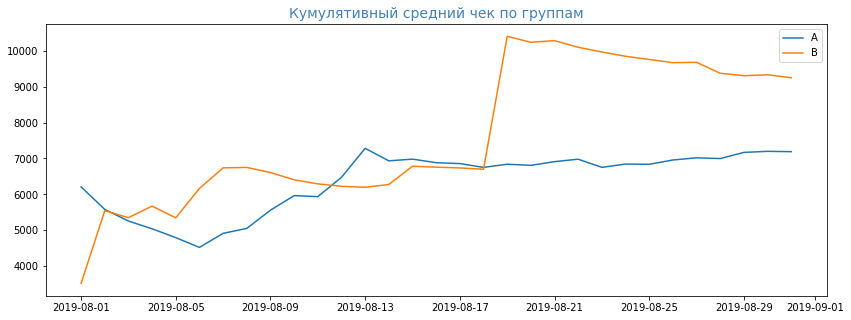

In [28]:
plt.figure(figsize=(14, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам', color = 'SteelBlue', fontsize=14)
plt.show()

При рассмотрении графика кумулятивного среднего чека по группам можем увидеть что вначале средний чек группы А падал до 06-08-2019 после постепенно возрастал и 13-08-2019 был его пик, выше, чем группы В(вероятнее попали крыпные заказы в этот промежуток в группу А) после пика незначительно снизился и остался на одном уровне. При рассмотрении кумулятивного среднего чека  группы В вначале он постепенно возрастал и относительно выше группы А, пересечение лишь было в пике группы А 13-08-2019, но после 17-08-2019 мы видим резкое возрастание группы В(крупные заказы попали в данный промежуток) после он немного снизился, но находится на относительно высоком уровне относительно группы А(следовательно в данной группе средний чек с 17-08-2019 по 01-09-2019 значительно выше группы А).

####  Относительные изменения кумулятивного среднего чека группы B к группе A

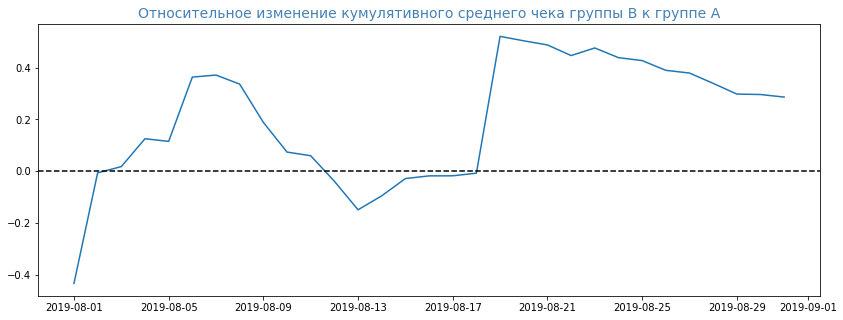

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(14, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А', color = 'SteelBlue', fontsize=14)
plt.show()

При рассмотрении относительного кумулятивного среднего чека группы В к А, можем увидеть постепенное его возрастание в первой половине тестирования, после резкий спад после 09-08-2019( возможно связанный с увеличением крупных заказов в группе А в данный период) но после снова видим возрастание графика после 17-09-2019 с постепенным снижением(в графике определенно есть выбросы та как имеются скачки). В общем относительное изменение кумулятивного среднего чека группы В выше группы А.

####  Кумулятивное среднее количество заказов на посетителям по группам 

In [30]:
# создаем массив уникальных пар значений дат и групп теста
datesGroupss = orders[['date', 'group']].drop_duplicates()

In [31]:
# агрегированные кумулятивные по дням данные о заказах 
ordersAggregatedd = datesGroupss.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitorId': 'nunique',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [32]:
# агрегированные кумулятивные по дням данные о посетителях
visitorsAggregatedd = datesGroupss.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [33]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeDataa = ordersAggregatedd.merge(
    visitorsAggregatedd, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeDataa.columns = [
    'date',
    'group',
    'buyers',
    'orders',
    'revenue',
    'visitors',
]

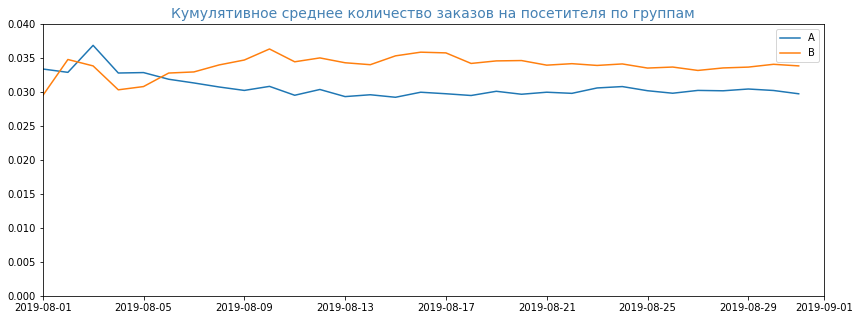

In [34]:
# считаем среднее количество заказов на посетителя
cumulativeDataa['conversion'] = cumulativeDataa['orders']/cumulativeDataa['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeDataa[cumulativeDataa['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeDataa[cumulativeDataa['group']=='B']

# строим графики
plt.figure(figsize=(14, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,9,1), 0, 0.04])
plt.title('Кумулятивное среднее количество заказов на посетителя по группам', color = 'SteelBlue', fontsize=14)
plt.show()

При рассмотрении графика кумулятивного среднего количества заказов на покупателя по группам видим в начале скачки(пиковые значения) в обоих группах, после 05-08-2019 значения стабилизировались и в группе В среднее количество заказов на посетителя стабильно больше, чем в группе А.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

No handles with labels found to put in legend.


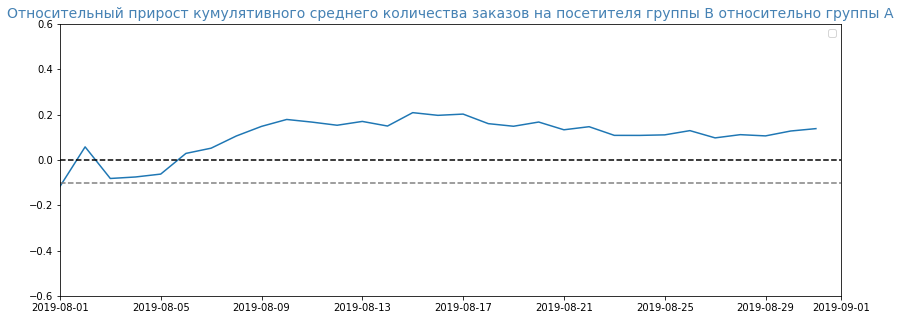

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--') 
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,9,1), -0.6, 0.6])
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A', color = 'SteelBlue', fontsize=14)
plt.show()

При рассмотрении относительного прироста кумулятивного среднего количества заказов на посетителя группы В относительно группы А можем увидеть колебания значений в начале тестирования пик и спад относительного значения, но после постепенный рост после 05-08-2019 и стабилизация относительного прироста кумулятивного среднего количества заказа группы В относительно группы А. Посетителя группы В стали чаще заказывать, чем в группе А.

#### Анализ выбросов и всплесков 

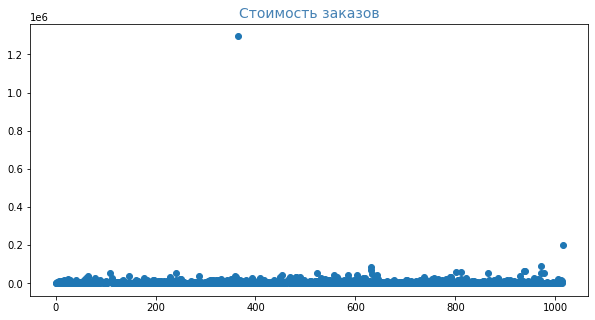

In [36]:
# построение точечного графика по значениям orders['revenue']
x_values = pd.Series(range(0,len(orders_unique['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_unique['revenue']) 
plt.title('Стоимость заказов', color = 'SteelBlue', fontsize=14)
plt.show()

In [37]:
# применение метода из библиотеки Numpy для определения 90, 95 и 99 перцентеля
np.percentile(orders_unique['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

При рассмотрении точечного графика по стоимости заказов можем увидеть небольшое количество аномально дорогих заказов. После с помощью библиотеки Numpy применили метод для высчитывания перцентелей, по которым 95 перцентель определяет, что не больше 5% заказов дороже 26785. Данную границу можем использовать в дальнейшем для очищенных данных, без аномалий. Граница в 99 перцентель определяет, что не больше 1% заказов дороже 53904.

In [38]:
# определение количества заказов пользователей методом группировки и сортировки
ordersByUsers = (
    orders_unique.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


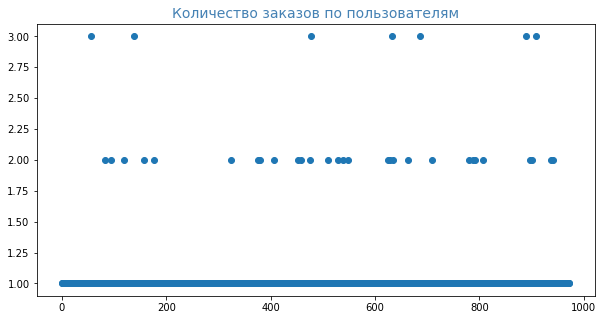

In [39]:
# построение точечного графика по значениям сформированного группировкой данных ordersByUsers['orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', color = 'SteelBlue', fontsize=14)
plt.show()

In [40]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

При рассмотрении точечного графика по количеству заказов можем увидеть небольшое количество аномалий. После с помощью библиотеки Numpy применили метод для высчитывания перцентелей, по которым 95 перцентель определяет, что не больше 5% пользователей сделали больше 1 заказа. Данную границу можем использовать в дальнейшем для очищенных данных, без аномалий. Граница в 99 перцентель определяет, что не больше 1% посетителей сделали больше 2 заказов.

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным 

**Н0** -  различий в среднем количестве заказов между группами нет

**Н1** - различия в среднем количестве заказов между группами есть

In [41]:
# формирование среза данных по группе А с формированием накопительных значений визитов по датам по датафрему visitors
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [42]:
# формирование среза данных по группе В с формированием накопительных значений визитов по датам по датафрему visitors
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [43]:
# формирование среза данных по датафрему orders, группе А с формированием накопительных значений заказов и выручки по датам 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


In [44]:
# формирование среза данных по датафрему orders, группе В с формированием накопительных значений заказов и выручки по датам 
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [45]:
# формирование датафрейма путем соединения ordersADaily и ordersBDaily методом merge()
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [46]:
#формирование среза группы А пользователей, которые заказывали хотя бы 1 раз и количество совершенных заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [47]:
#формирование среза группы В пользователей, которые заказывали хотя бы 1 раз и количество совершенных заказов
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [48]:
# формирование выборок для каждой группы с формированием пользователей и их заказов, в том числе кто ничего не заказывал(0)
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series
                     (0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series
                     (0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
                    axis=0)

In [49]:
# различие в среднем  числе заказов на пользователя между группами с применением теста Манна-Уитни
'p-value = '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'p-value = 0.017'

In [50]:
# относительный прирост среднего числа заказов группы B
'относительный прирост среднего числа заказов группы B составляет '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'относительный прирост среднего числа заказов группы B составляет 0.138'

Число р-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

####  Статистическая значимость различий в среднем чеке заказов на посетителя между группами по «сырым» данным

**Н0** -  различий в среднем чеке заказов на посетителя между группами нет

**Н1** - различия в среднем чеке заказов на посетителя между группами есть

In [51]:
# формируем данные о выручке по группам и  пернедаем данные тесту Манна-Уитни
'p-value = ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'p-value = 0.729'

In [52]:
# нахождение относительного различия среднего чека между группами
'относительный прирост среднего чека группы В - ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'относительный прирост среднего чека группы В - 0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое относительное увеличение среднего чека группы B выше среднего чека группы A,на 25.9% не является статистически важным.

####  Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по очищенным данным 

**Н0** -  различий в среднем количестве заказов между группами нет

**Н1** - различия в среднем количестве заказов между группами есть

In [53]:
# формирование срезов данных без аномальных данных
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
revenue_lim = np.percentile(orders_unique['revenue'], 95)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

115

In [54]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [55]:
'p-value = ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])


'p-value = 0.020'

In [56]:
'относительный прирост среднего числа заказов группы B составляет ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'относительный прирост среднего числа заказов группы B составляет 0.162'

Число р-value = 0.02 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем, вывод не поменялся и остался тем же, что и по "сырым" данным. Относительный выигрыш группы B равен 16.2% — второе число в выводе, повысилось с 13.8%

####  Cтатистическая значимость различий в среднем чеке заказа  между группами по очищенным данным   

**Н0** -  различий в среднем чеке заказов на посетителя между группами нет

**Н1** - различия в среднем чеке заказов на посетителя между группами есть

In [57]:
print(
    'p-value = ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'относительный прирост среднего чека группы В - '"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.767
относительный прирост среднего чека группы В - -0.022


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Данное значение по сравнению с "сырыми" данными не поменялось. А вот средний чек группы B относительно группы А сильно снизился с 25.9% до -2.2% и эти значения не являются статистически значимыми.

**Вывод**

Мы провели А/В тестирование и выгрузили его результаты, в первом датафреме находится информация о индификаторе заказа, идентификаторе пользователя, дату, когда был совершен заказ, выручку заказа и группу А/В теста, куда попал заказ. А так же можем увидеть, что в данном датафрейме 5 столбцов и 1197 сток. Во втором датафреме находится информация о дате, группе А/В теста и количестве пользователей в указанную дату в указанной группе A/B-теста. А так же информацию о том, что в данном датафрейме 3 столбца и 62 строки. По выведенной общей информации по датафреймам можем увидеть, что в данных не имеется пропусков в значениях, количество строк общее и в каждом из столбцов совпадает.

После провели проверку распредления групп тестирования, выявлено пересечение пользователей, 58 пользователей оказались в двух группах одновременно, данный момент выявлен, из за сложности выведения данных пользователей, они останутся в анализе и анализ будет проводится с учетом, что часть пользователей попала в обе группы. В дальнейшем для расчета кумулятивной выручки и среднего чека будем использовать очищенные данные без части пользователей, попавших в обе группы. При расчете количества заказов будем использовать данные с часть пользователей в двух группах.
**Рекомендации** *просмотреть порядок распределения пользователей по группам для дальнейшего предотвращения пересечни массивов.*

При рассмотрении кумулятивной выручки, она постепенно растет в двух группах. Примерно до 13-08-2019 возрастала равномерно в двух группах, после группа В стала относительно возрастать группы А, так же видим *резкий скачок группы В после 17-08-2019 кумулятивная выручка осталась на относительно высоком уровне от группы А.*

При рассмотрении кумулятивного среднего чека по группам можем увидеть что вначале средний чек группы А падал до 06-08-2019 после постепенно возрастал и 13-08-2019 был его пик, выше, чем группы В после пика незначительно снизился и остался на одном уровне. При рассмотрении кумулятивного среднего чека  группы В вначале он постепенно возрастал и относительно выше группы А, пересечение лишь было в пике группы А 13-08-2019, но *после 17-08-2019 мы видим резкое возрастание кумулятивного среднего чека группы В после он немного снизился, но находится на относительно высоком уровне относительно группы А.*

При рассмотрении относительного кумулятивного среднего чека группы В к А, можем увидеть постепенное его возрастание в первой половине тестирования, после резкий спад после 09-08-2019(возможно связанный с увеличением крупных заказов в группе А в данный период) но после снова видим возрастание графика после 17-09-2019 с постепенным снижением(в графике определенно есть выбросы та как имеются скачки). *В общем относительное изменение кумулятивного среднего чека группы В выше группы А.*

При рассмотрении кумулятивного среднего количества заказов на покупателя по группам видим в начале скачки(пиковые значения) в обоих группах, после 05-08-2019 значения стабилизировались и *в группе В среднее количество заказов на посетителя стабильно больше, чем в группе А.*

При рассмотрении относительного прироста кумулятивного среднего количества заказов на посетителя группы В относительно группы А можем увидеть колебания значений в начале тестирования пик и спад относительного значения, но после *постепенный рост после 05-08-2019 и стабилизация относительного прироста кумулятивного среднего количества заказа группы В относительно группы А. Посетителя группы В стали чаще заказывать, чем в группе А.*

Произвели анализ аномалий в данных, выявили,что *не больше 5% заказов дороже 26785, а так же не больше 5% пользователей сделали больше 1 заказа. Данные границы в дальнейшем использовали для очищенных данных.

При подсчете статистической значимости различий в среднем количестве заказов на посетителя между группами в сырых данных выявили, что число р-value = 0.017 меньше 0.05. В свя зи с этим нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергли. Относительный выигрыш группы B равен 13.8% — второе число в выводе. При проведении данного расчета по очищенным данным число р-value = 0.02, остался меньше 0.05, а значит и *по сырым и по очищенным данным нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.  Относительный выигрыш группы B равен 16.2% по очищенным данным он повысился, та как в сырых он составлял 13.8%*

При подсчете  статистической значимости различий в среднем количестве заказов на посетителя между группами в сырых данных выявили, что число р-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A,на 25.9%, но не имеет статистической важности. При проведении данного расчета по очищенным данным число р-value значительно больше 0.05(0.767), а значит и *по сырым и по очищенным данным нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет,нельзя отвергать.  Относительное значение группы B равно -2.2% по очищенным данным оно снизилось, так как в сырых оно составлял 25.9%б но не является статистически значимым*

**Решение по результатам теста - остановить тестирование и зафиксировать победу группы В.**